In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys


from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
import astropy.units as u

import sncosmo

Remove blacklisted models and create an array of models to be used in simulations

In [2]:
modtab = Table.read('vincenzi_2019_models.fits')
faulty=('SN2013by','SN2013fs','SN2009bw','SN2012aw','SN2009kr','ASASSN14jb','SN2013am','SN2008ax','SN2008fq','SN2009ip','IPTF13bvn','SN2008D','SN1994I',
'SN2007gr','SN2009bb','SN2007ru')
faulty=set(faulty)

In [3]:
typeii=[]
names=[]
select = modtab['Type'] == 'II'
for mod in modtab[select]:
    nm = mod['Name']
    tp = mod['Type']
    
    if nm in faulty:
        pass
    else:
         # Get the corresponding sncosmo model with host dust correction applied.
        if nm.startswith('SN'):
            model_name = 'v19-{}-corr'.format(nm[2:].lower())
            model = sncosmo.Model(model_name)
            model.set(z=0., amplitude=1e-5, t0=0.)
            typeii.append(model)
            names.append(nm)
            
        else:
            model_name = 'v19-{}-corr'.format(nm.lower())
            model = sncosmo.Model(model_name)
            model.set(z=0., amplitude=1e-5, t0=0.)
            typeii.append(model)
            names.append(nm)
        
            
       

   

In [4]:
len(typeii)

15

In [6]:
def setwave(model,z):
    """creates waves and fluxes for a given model at different times in its evolution
    
    Parameters
    ----------
    model : sncosmo.Model
        Model object instantiated for this template.
    
    Returns
    -------
    fluxes and wavelengths in separate arrays
  
    """
    waves=[]
    fluxes=[]
    tmin = np.maximum(np.round(model.mintime(), 0), -10)
    tmax = np.minimum(np.round(model.maxtime(), 0), 28)
    times = np.round(np.linspace(tmin, tmax, 16), 0)
    
    model.set(z=z, amplitude=1., t0=0.)
    
    wmin = np.maximum(1650., model.minwave())
    wmax = np.minimum(9800., model.maxwave())
    wave = np.arange(wmin, wmax)
    
    for t in times:
         flux = model.flux(time=t, wave=wave)
            
         waves.append(wave)
         fluxes.append(flux)
        
        
    return waves,fluxes

In [72]:
name=names[0]

wave,flux=setwave(typeii[0])
a=wave[0]
b=flux[0]

factor=10e16/max(f)
b=b*factor

#ascii.write([a,b], 'test.dat', overwrite=True)
name,len(wave),len(b),max(b)

('ASASSN15oz', 16, 8150, 1.5210827155447562e+17)

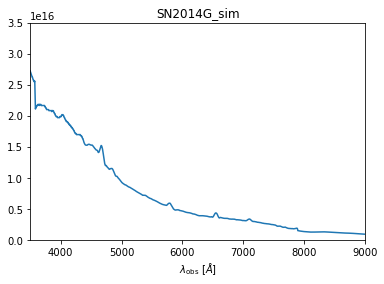

In [67]:
fig, ax = plt.subplots()
ax.plot(c,d)
ax.set(xlabel=r'$\lambda_\mathrm{obs}$ [$\AA$]',title='SN2014G_sim',xlim=(3500,9000),ylim=(0,3.5e16))#ylim=(-2,100)

plt.show()

In [7]:
def write_models(types,names,z):
    
    for i in range (len(typeii)):
        name=names[i]
        wave,fluxes=setwave(typeii[i],z)
        a=wave[0]
        
        flux=[]
        for fl in fluxes:
            factor=10e16/max(fl)
            fl=fl*factor
            flux.append(fl)
            
        t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15=flux[0],flux[1],flux[2],flux[3],flux[4],flux[5],flux[6],flux[7],flux[8],flux[9],flux[10],flux[11],flux[12],flux[13],flux[14],flux[15]
    
        ascii.write([a,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15], '{}.{}.dat'.format(name,z), overwrite=True)
    
    
   


In [8]:
write_models(typeii,names,0.015930)